In [1]:
import supervisely_lib as sly
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from inference import UnetV2Applier

%matplotlib inline

In [2]:
netw = UnetV2Applier()

{"message": "Will init all required to inference.", "timestamp": "2018-10-04T15:58:04.497Z", "level": "info"}
{"message": "Input config", "config": {"gpu_devices": [0], "model_classes": {"save_classes": "__all__", "add_suffix": "_unet"}, "existing_objects": {"save_classes": [], "add_suffix": ""}, "mode": {"source": "sliding_window", "window": {"width": 400, "height": 400}, "min_overlap": {"x": 60, "y": 60}, "save": true}}, "timestamp": "2018-10-04T15:58:04.499Z", "level": "info"}
{"message": "Full config", "config": {"gpu_devices": [0], "model_classes": {"save_classes": "__all__", "add_suffix": "_unet"}, "existing_objects": {"save_classes": [], "add_suffix": ""}, "mode": {"source": "sliding_window", "window": {"width": 400, "height": 400}, "min_overlap": {"x": 60, "y": 60}, "save": true, "class_name": "sliding_window"}}, "timestamp": "2018-10-04T15:58:04.500Z", "level": "info"}
{"message": "Model input size is read (for auto-rescale).", "input_size": {"width": 512, "height": 256}, "tim

In [3]:
model = sly.utils.InfFeederSlWindow(netw.config, netw.helper.in_project_meta, netw.train_classes)

In [4]:
project_meta = netw.helper.in_project_meta  # Project meta contains list of project classes.
project_dir = netw.helper.paths.project_dir
project_fs = sly.ProjectFS.from_disk_dir_project(project_dir)

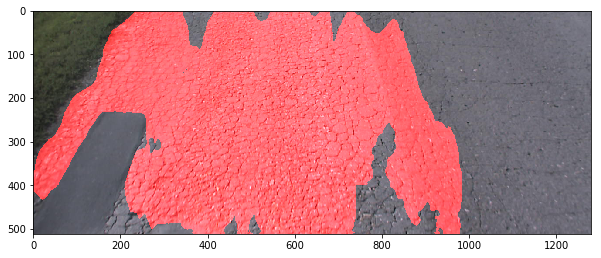

In [5]:
for item_descr in project_fs:
    img = cv2.imread(item_descr.img_path)[:, :, ::-1]
    ann_packed = sly.json_load(item_descr.ann_path)
    blank_mask = np.zeros((img.shape[0], img.shape[1], 3)).astype('uint8')
    ann = sly.Annotation.from_packed(ann_packed, project_meta)
    new_ann = model.feed(img, ann, netw._infer_on_img)
    for obj in new_ann["objects"]:
        if obj.class_title == 'crack_net_unet':
            obj.draw(blank_mask, [255, 0, 0])
    res = cv2.addWeighted(img, 1., blank_mask, .7, 0)
    plt.figure(figsize=(10, 10))
    plt.imshow(res)
    plt.show()